# Homework module 8: Neural networks and deep learning

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

2022-11-20 19:43:32.874346: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
tf.__version__

'2.9.1'

In [ ]:
# getting data for training
!wget -c https://github.com/alexeygrigorev/dino-or-dragon/releases/download/data/dino-dragon.zip
!unzip dino-dragon.zip

* Setting inputs to model and compiling Keras model

In [4]:
tf.random.set_seed(89)

inputs = keras.Input(shape=(150, 150, 3))

conv = keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu')(inputs)

pool = keras.layers.MaxPooling2D(pool_size = (2, 2))(conv)

flat = keras.layers.Flatten()(pool)

pre_outputs = keras.layers.Dense(units = 64, activation = 'relu')(flat)

outputs = keras.layers.Dense(units = 1, activation='sigmoid')(pre_outputs)

model = keras.Model(inputs, outputs)

learning_rate = 0.002

optimizer = keras.optimizers.SGD(lr=learning_rate, momentum=0.8)

loss = keras.losses.BinaryCrossentropy()

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

2022-11-20 19:43:38.312086: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-20 19:43:38.319347: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-20 19:43:38.319939: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-20 19:43:38.321218: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                             

### Question 1 and Question 2:
    Q1: binary crossentropy
    Q2: 11215873

## Generators and Training

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
# setting train and test generators
train_generator = ImageDataGenerator(rescale = 1./255)

train_ds = train_generator.flow_from_directory(
    './train/',
    target_size=(150, 150),
    batch_size = 20,
    shuffle = True,
    class_mode = 'binary'
)

test_generator = ImageDataGenerator(rescale = 1./255,)

test_ds = test_generator.flow_from_directory(
    './test/',
    target_size=(150, 150),
    batch_size = 20,
    shuffle = True,
    class_mode = 'binary'
)

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


In [8]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)

Epoch 1/10


2022-11-20 19:43:40.631369: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-11-20 19:43:41.262070: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-20 19:43:41.262961: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-20 19:43:41.263003: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-11-20 19:43:41.263889: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-20 19:43:41.263969: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


80/80 [==============================] - 11s 104ms/step - loss: 0.6414 - accuracy: 0.6694 - val_loss: 0.5314 - val_accuracy: 0.7868
Epoch 2/10
80/80 [==============================] - 8s 102ms/step - loss: 0.4694 - accuracy: 0.8156 - val_loss: 0.4502 - val_accuracy: 0.7792
Epoch 3/10
80/80 [==============================] - 8s 102ms/step - loss: 0.3918 - accuracy: 0.8413 - val_loss: 0.3630 - val_accuracy: 0.8553
Epoch 4/10
80/80 [==============================] - 8s 102ms/step - loss: 0.3663 - accuracy: 0.8450 - val_loss: 0.3442 - val_accuracy: 0.8604
Epoch 5/10
80/80 [==============================] - 8s 102ms/step - loss: 0.3089 - accuracy: 0.8858 - val_loss: 0.3407 - val_accuracy: 0.8629
Epoch 6/10
80/80 [==============================] - 8s 102ms/step - loss: 0.2999 - accuracy: 0.8745 - val_loss: 0.3568 - val_accuracy: 0.8325
Epoch 7/10
80/80 [==============================] - 8s 102ms/step - loss: 0.2626 - accuracy: 0.8996 - val_loss: 0.2909 - val_accuracy: 0.8680
Epoch 8/10
80/80

### Question 3

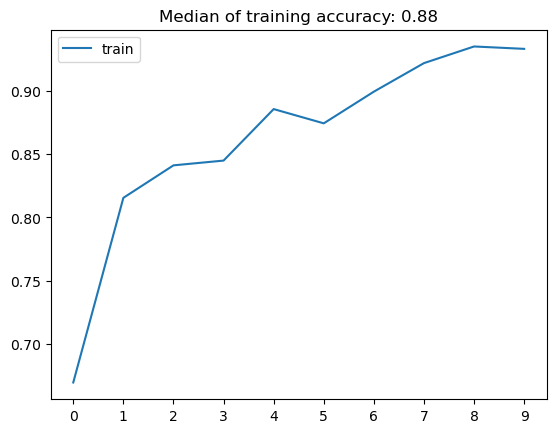

In [9]:
from statistics import median
plt.plot(history.history['accuracy'], label='train')
plt.title('Median of training accuracy: '+"{:.2f}".format(median(history.history['accuracy'])))
plt.xticks(np.arange(10))
plt.legend()

##### Q3 answer: 0.90

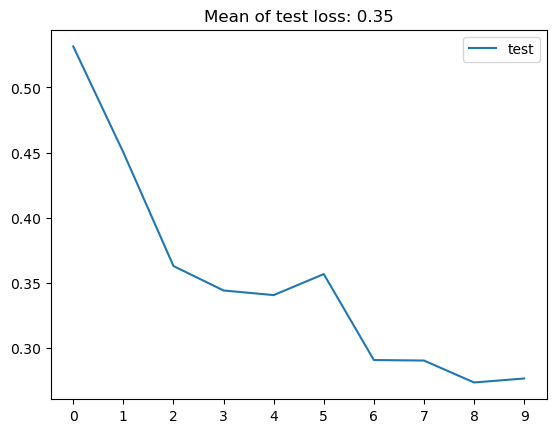

In [10]:
from statistics import mean
plt.plot(history.history['val_loss'], label='test')
plt.title('Mean of test loss: '+"{:.2f}".format(mean(history.history['val_loss'])))
plt.xticks(np.arange(10))
plt.legend()

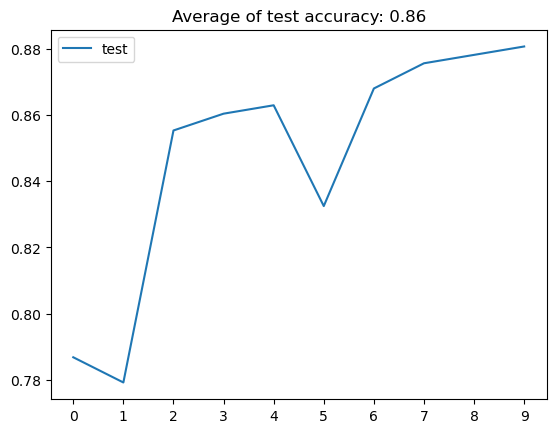

In [11]:
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Average of test accuracy: '+"{:.2f}".format(mean(history.history['val_accuracy'][-1-5:-1])))
plt.xticks(np.arange(10))
plt.legend()

### Question 4

In [12]:
from statistics import stdev
print('Standard deviation of training loss for all the epochs: '+"{:.2f}".format(stdev(history.history['loss'])))

Standard deviation of training loss for all the epochs: 0.14


##### Q4 answer: 0.11

## Data Augmentation

In [13]:
# augmenting train data
train_generator = ImageDataGenerator(rescale = 1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

train_ds = train_generator.flow_from_directory(
    './train/',
    target_size=(150, 150),
    batch_size = 20,
    shuffle = True,
    class_mode = 'binary'
)

Found 1594 images belonging to 2 classes.


In [14]:
# training on augmented data
history_2 = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)

Epoch 1/10
80/80 [==============================] - 15s 186ms/step - loss: 0.4464 - accuracy: 0.7992 - val_loss: 0.3738 - val_accuracy: 0.8299
Epoch 2/10
80/80 [==============================] - 15s 183ms/step - loss: 0.4185 - accuracy: 0.8130 - val_loss: 0.3789 - val_accuracy: 0.8325
Epoch 3/10
80/80 [==============================] - 15s 184ms/step - loss: 0.3989 - accuracy: 0.8294 - val_loss: 0.3757 - val_accuracy: 0.8452
Epoch 4/10
80/80 [==============================] - 15s 184ms/step - loss: 0.4027 - accuracy: 0.8130 - val_loss: 0.3402 - val_accuracy: 0.8503
Epoch 5/10
80/80 [==============================] - 15s 182ms/step - loss: 0.3966 - accuracy: 0.8381 - val_loss: 0.4703 - val_accuracy: 0.7868
Epoch 6/10
80/80 [==============================] - 15s 182ms/step - loss: 0.3733 - accuracy: 0.8407 - val_loss: 0.3182 - val_accuracy: 0.8579
Epoch 7/10
80/80 [==============================] - 15s 183ms/step - loss: 0.3484 - accuracy: 0.8463 - val_loss: 0.4246 - val_accuracy: 0.8173

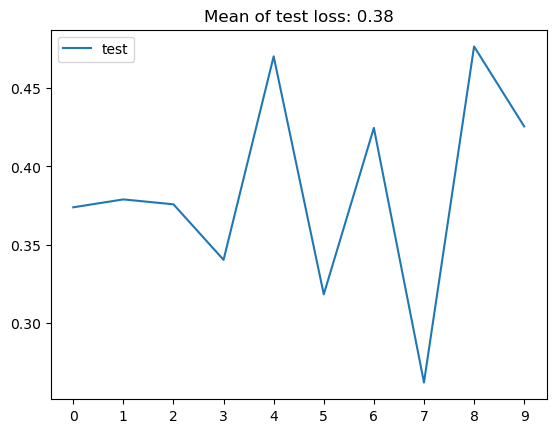

In [17]:
plt.plot(history_2.history['val_loss'], label='test')
plt.title('Mean of test loss: '+"{:.2f}".format(mean(history_2.history['val_loss'])))
plt.xticks(np.arange(10))
plt.legend()

### Question 5
Q4: 0.37

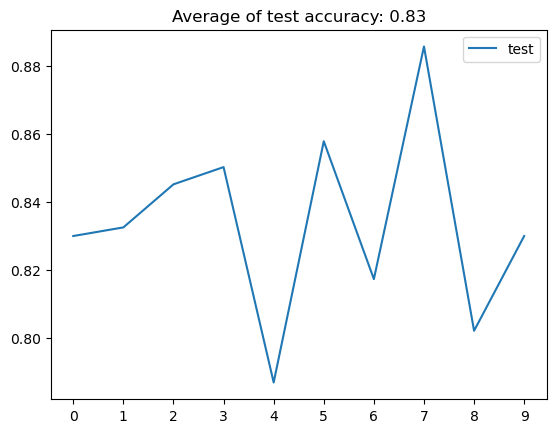

In [18]:
plt.plot(history_2.history['val_accuracy'], label='test')
plt.title('Average of test accuracy: '+"{:.2f}".format(mean(history_2.history['val_accuracy'][-1-5:-1])))
plt.xticks(np.arange(10))
plt.legend()

### Question 6
Q4: 0.84